In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pwd


'C:\\Users\\USER\\Downloads\\Bitcoin'

In [5]:
ls


 Volume in drive C has no label.
 Volume Serial Number is 864A-7F66

 Directory of C:\Users\USER\Downloads\Bitcoin

07/09/2025  09:17 AM    <DIR>          .
07/09/2025  08:56 AM    <DIR>          ..
07/08/2025  05:43 PM    <DIR>          .ipynb_checkpoints
07/08/2025  04:57 PM           752,033 bitcoin_analysis_Shan_Singh.ipynb
07/05/2025  10:27 AM           111,221 bitcoin_price_Training - Training.csv
07/09/2025  09:17 AM             7,438 My Bitcoin analysis.ipynb
               3 File(s)        870,692 bytes
               3 Dir(s)  403,315,195,904 bytes free


In [6]:
df = pd.read_csv(r'bitcoin_price_Training - Training.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [9]:
df.dtypes


Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [10]:
df['Date'] = df['Date'].astype('datetime64[ns]')
#Same as pdf.to_datetime()


In [11]:
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [12]:
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [13]:
df['Date']

0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: Date, Length: 1556, dtype: datetime64[ns]

In [15]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [19]:
df.tail(5)

,Date,Open,High,Low,Close,Volume,Market Cap
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [22]:
data = df.sort_index().reset_index()

In [21]:
#What was the change in price os the stock overtime?

In [23]:
data

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...,...
1551,1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [25]:
data.drop('index', axis=1, inplace=True)

In [26]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

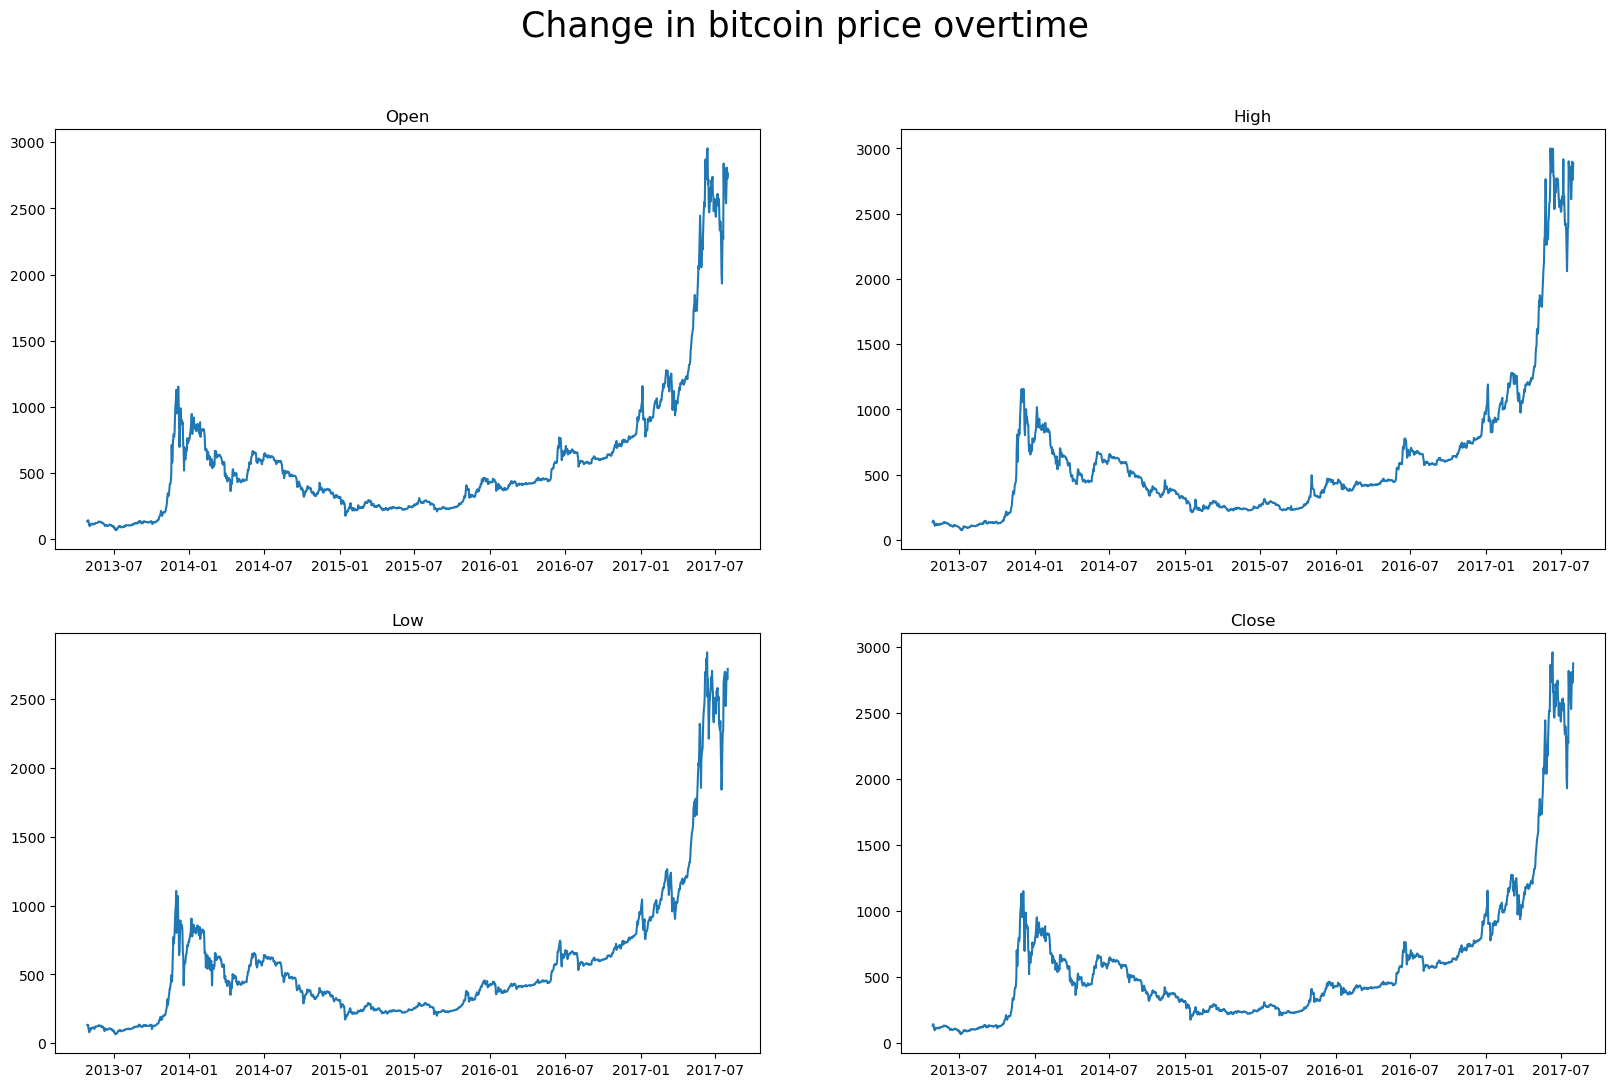

In [37]:
plt.figure(figsize=(20,12))
plt.suptitle("Change in bitcoin price overtime", fontsize=25)

for index, col in enumerate (['Open', 'High', 'Low', 'Close'], 1):
    plt.subplot(2,2,index)
    plt.plot(df['Date'], df[col])
    plt.title(col) 


In [38]:
#Analysing open, high, low, close value of bitcoin

In [40]:
data.shape

(1556, 7)

In [58]:
bitcoin_sample = data[:50]

In [100]:
bitcoin_sample2 = data[0:31]
#The month of July 2017

In [75]:
df[df['Date'] == '2017-07-01'].index


Index([30], dtype='int64')

In [76]:
df[df['Date'] == '2017-07-31'].index


Index([0], dtype='int64')

In [42]:
!pip install chart_studio
!pip install plotly

In [44]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

In [46]:
init_notebook_mode(connected=True)

In [101]:
trace = go.Candlestick(x=bitcoin_sample2['Date'],
              high = bitcoin_sample2['High'],
               open = bitcoin_sample2['Open'],
               close = bitcoin_sample2['Close'],
              low = bitcoin_sample2['Low'])


In [102]:
candle_data = [trace]
layout = {'title':'Bitcoin Price(July 2017)',
          'xaxis': {'title':'Date'},
          'height':500
          }

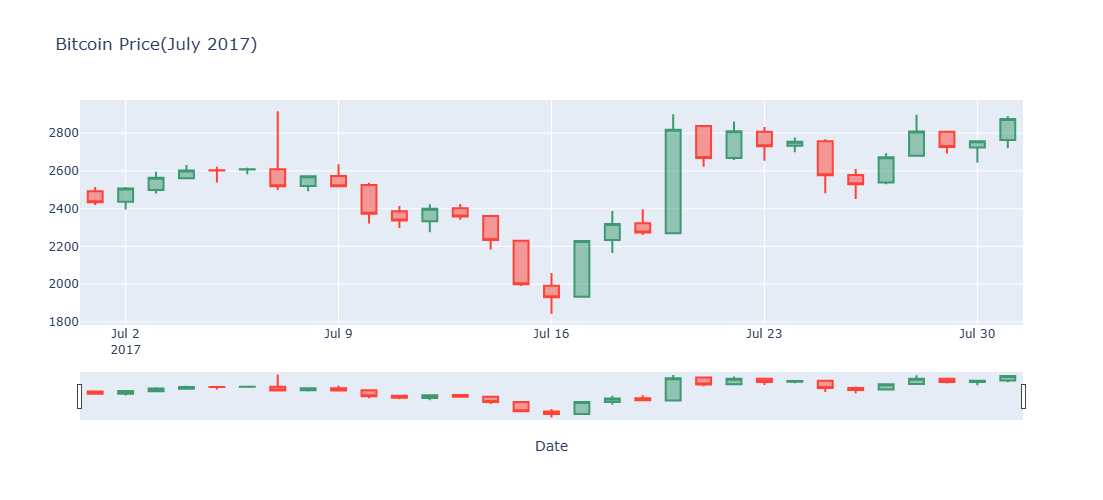

In [103]:
fig = go.Figure(data = candle_data, layout=layout)
fig

In [89]:
print(bitcoin_sample2.head(1))


        Date     Open     High      Low    Close       Volume      Market Cap
0 2017-07-31  2763.24  2889.62  2720.61  2875.34  860,575,000  45,535,800,000


In [95]:
##Analysing Closing price


In [107]:
data.set_index('Date', inplace=True)

In [110]:
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"


<Axes: xlabel='Date'>

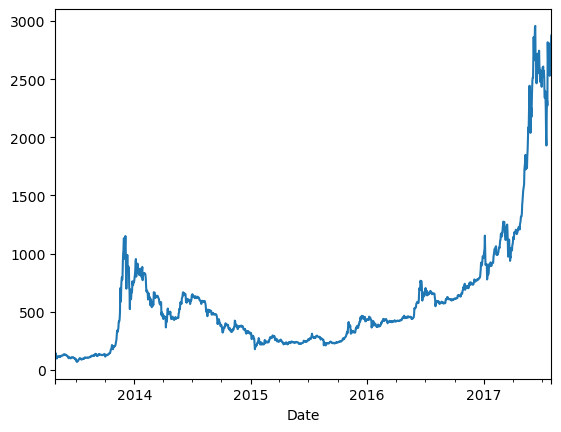

In [111]:
data['Close'].plot()

Text(0.5, 1.0, 'Log Scale')

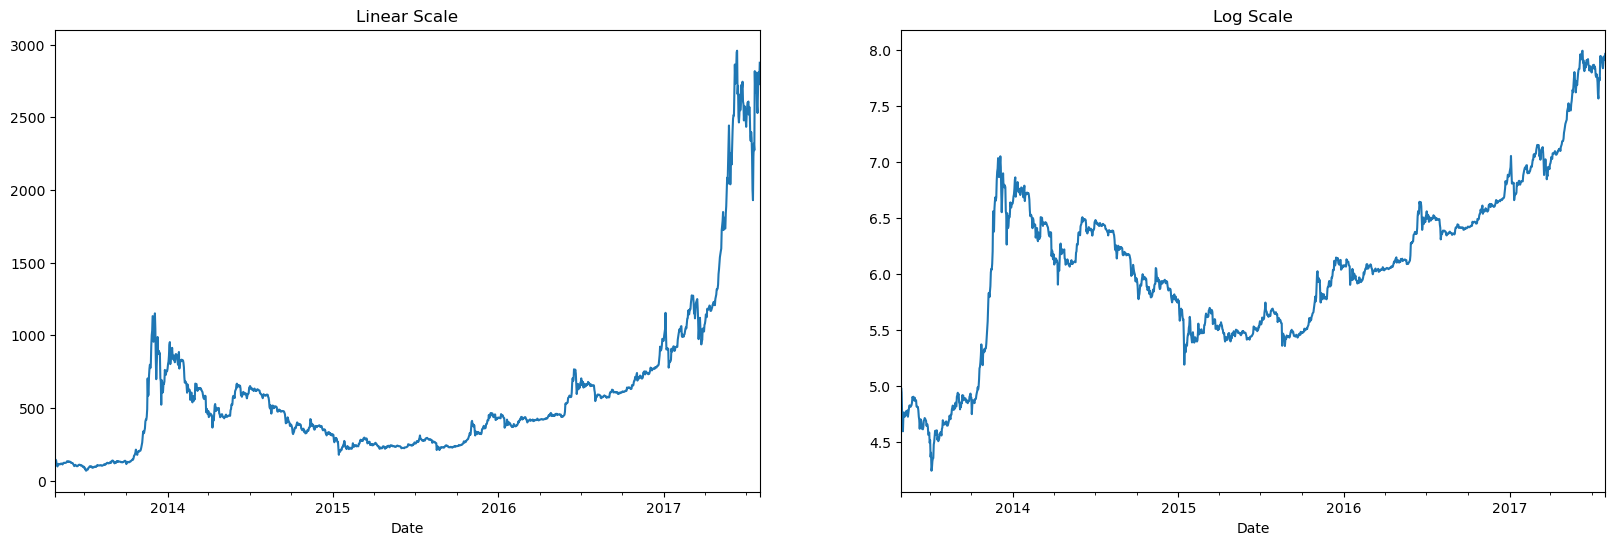

In [114]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
data['Close'].plot()
plt.title('Linear Scale')

plt.subplot(1,2,2)
np.log1p(data['Close']).plot()
plt.title('Log Scale')


In [115]:
#Analyse closing price on yearly, quaterly, monthly basis

In [122]:
data['Close'].resample('YE').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: YE-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

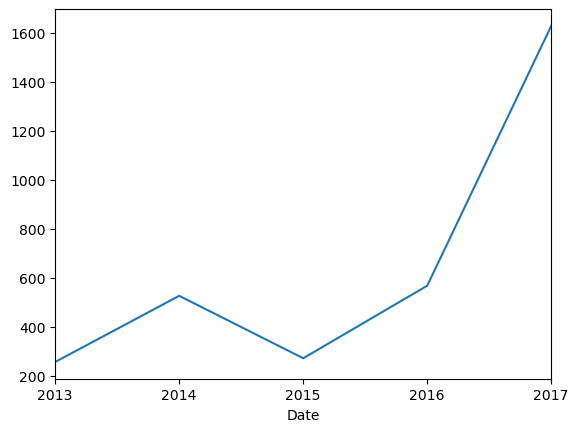

In [123]:
data['Close'].resample('YE').mean().plot()

<Axes: xlabel='Date'>

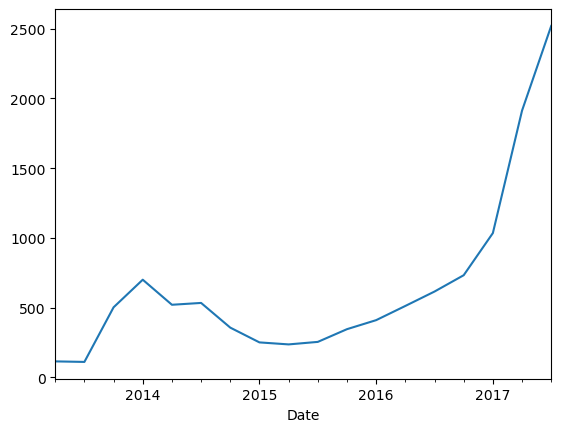

In [125]:
data['Close'].resample('QE').mean().plot()

<Axes: xlabel='Date'>

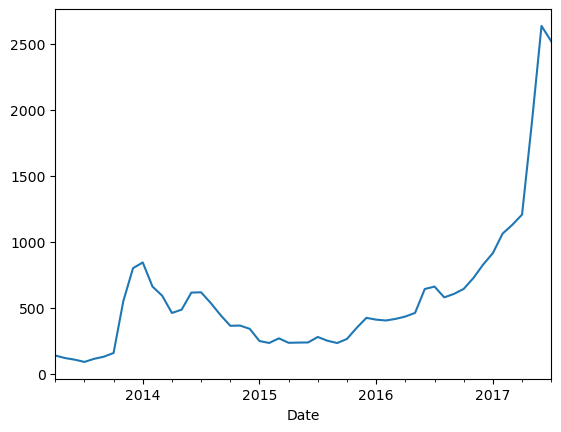

In [127]:
data['Close'].resample('ME').mean().plot()

In [129]:
#Analysing daily change in closing price of stocks

In [130]:
data


,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"


In [133]:
data['Close_price_pct_change'] = data['Close'].pct_change()*100

In [134]:
data['Close_price_pct_change']

Date
2017-07-31          NaN
2017-07-30    -4.109427
2017-07-29    -1.114545
2017-07-28     3.028113
2017-07-27    -4.885351
                ...    
2013-05-02     7.631714
2013-05-01    11.196654
2013-04-30    18.813574
2013-04-29     3.985612
2013-04-28    -7.146811
Name: Close_price_pct_change, Length: 1556, dtype: float64

<Axes: xlabel='Date'>

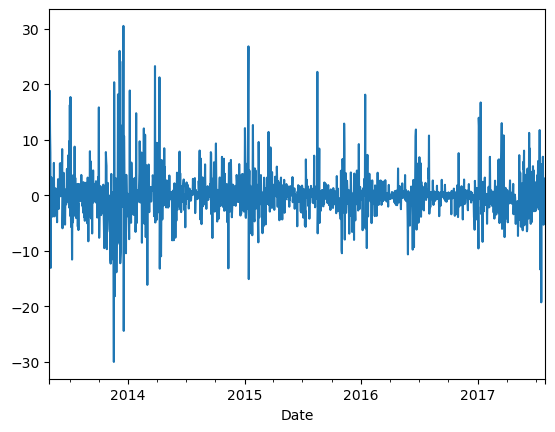

In [135]:
data['Close_price_pct_change'].plot()

In [136]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
init_notebook_mode(connected=True)

In [139]:
!pip install cufflinks
import cufflinks as cf

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68721 sha256=380408680c32d243cc024637d5a63acd16bf2a3c741af386c1f2877a8625189b
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\c0\d9\70\372130dacf508192607c1a7359c7bf0656b1a3b79f6cf66f7a
Successfully built cufflinks


In [140]:
cf.go_offline()

C:\Users\USER\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



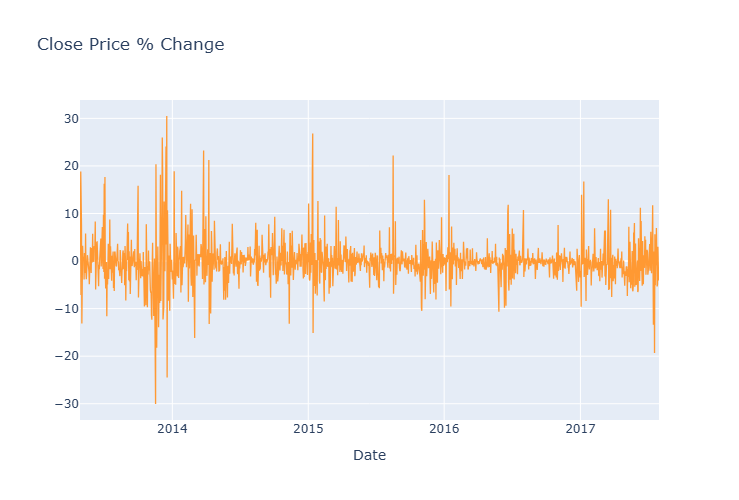

In [143]:
data['Close_price_pct_change'].iplot(
    layout=dict(title='Close Price % Change', 
                xaxis=dict(title='Date'),
               height=500))